# Overview

With the proliferation of online ordering, curating a seamless and engaging digital shopping experience is an ongoing challenge. Product managers must continuously analyze competitor offerings and identify opportunities for differentiation. Key factors such as ratings, price, category, and manufacturer play a crucial role in shaping product strategy and staying ahead of the competition.


This data collected from Amazon was uploaded to Kaggle by user ‘The Devastator’. The follow is a data dictionary listing and describing the attributes in the data file.

- **product_name**: The name of the product. (String)

- **manufacturer:** The manufacturer of the product. (String)
- **price**: The price of the product in British Pounds. (String)
- **number_available_in_stock**: The number of the product available in stock. (String)
- **number_of_reviews**: The number of reviews for the product. (Integer)
- number_of_answered_questions: The number of questions answered for the product. (Integer)
- **average_review_rating**: The average review rating for the product. (String)
- **amazon_category_and_sub_category**: The Amazon category and subcategory for the product. (String)
- customers_who_bought_this_item_also_bought: The customers who bought this item also bought. (String)
- description: The description of the product. (String)
- product_information: The product information. (String)
- product_description: The product description. (String)
- items_customers_buy_after_viewing_this_item: The items customers buy after viewing this item. (String)
- customer_questions_and_answers: The customer questions and answers. (String)
- customer_reviews: The customer reviews. (String)
- sellers: The sellers. (String)

Question that can be answered from this data:
Which key features in a product offering influence high customer rating? Elements of interest will include price, category, and manufacturer.


Source: https://www.kaggle.com/datasets/thedevastator/fashion-products-on-amazon-ratings-prices-and-pa


# Data Acquisition

In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import re
from scipy.sparse import lil_matrix
import scipy.spatial.distance
from sklearn import preprocessing

path='amazon_co-ecommerce_sample.csv'
df=pd.read_csv(path)
df.shape


(10000, 18)

# Data Preprocessing
On first glance, there are a number of attribute that can be ignored for this data analysis such as:
- unique ID
- number of reviews
- number of answered questions
- customers who bought this item also bought
- description
- product information
- product description
- items customers buy after viewing this item
- customer questions and answers
- customer reviews
- sellers

In addition, amazon category and sub category will be removed for this early analysis.


In [2]:
df.head()

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [3]:

df=df.drop(['uniq_id','index', 'number_of_answered_questions', 'customers_who_bought_this_item_also_bought', 'description', 'product_description', 'items_customers_buy_after_viewing_this_item', 'customer_questions_and_answers', 'customer_reviews', 'sellers', 'product_information'], axis=1)
df.shape

(10000, 7)

Now we are left with 10000 rows and 7 columns

## Data Exploration
There are a number of missing values in the stock, price, and review columns.
Due to the sheer size of this 10,000 row dataset, it would be best to remove those rows.
However, Missing in number of reviews may point to some interesting conclusions...

In [4]:
df.describe()


,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,average_review_rating,amazon_category_and_sub_category
count,10000,9993,8565,7500,9982,9982,9310
unique,9964,2651,2625,89,194,19,255
top,Polyhedral Dice,LEGO,£9.99,2 new,1,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
freq,3,171,189,1337,4315,5140,880


In [5]:
df.isna().sum()

product_name                           0
manufacturer                           7
price                               1435
number_available_in_stock           2500
number_of_reviews                     18
average_review_rating                 18
amazon_category_and_sub_category     690
dtype: int64

## Data Cleaning 
Missing values, Correcting Datatypes, Handling Dupes
- drop Nan
- clean price
- clean column names

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()


product_name                        0
manufacturer                        0
price                               0
number_available_in_stock           0
number_of_reviews                   0
average_review_rating               0
amazon_category_and_sub_category    0
dtype: int64

In [8]:
df.shape

(5904, 7)

In [9]:
df=df.rename(columns={"number_available_in_stock": "stock_quant", "number_of_reviews": "num_reviews", "average_review_rating": "avg_rating", "amazon_category_and_sub_category":"category_subcategory"})


#df['num_reviews'] = pd.to_numeric(df['num_reviews'])
#count na values for other columns
df.head()

,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category_subcategory
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
7,Hornby Santa's Express Train Set,Hornby,£69.93,3 new,36,4.3 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
8,Hornby Gauge Western Express Digital Train Set...,Hornby,£235.58,4 new,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,£27.49,6 new,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...


In [10]:
df.shape

(5904, 7)

### Highlights Categories and Sub Categories

In [11]:
# Convert to DataFrame
df["category_subcategory"].value_counts()


category_subcategory
Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles    589
Figures & Playsets > Science Fiction & Fantasy                                     327
Characters & Brands > Disney > Toys                                                254
Party Supplies > Decorations > Balloons                                            236
Party Supplies > Banners, Stickers & Confetti > Banners                            220
                                                                                  ... 
Medication & Remedies > Pain & Fever > Hot & Cold Therapies                          1
Sports Toys & Outdoor > Bikes, Trikes & Ride-ons > Scooters                          1
Baby & Toddler Toys > Activity Centres                                               1
Indoor Lighting > Specialty & Decorative Lighting                                    1
Novelty & Special Use > Novelty > Accessories > Buttons & Pins                       1
Name: count, Length: 2

In [12]:
pattern = r"^(.*?)\s?>\s?(.*)$"

# Apply regex to extract Category and Subcategory
df[['category', 'subcategory']] = df['category_subcategory'].str.extract(pattern)

df=df.drop('category_subcategory', axis=1)
df

,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,subcategory
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,4.9 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,3.9 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
7,Hornby Santa's Express Train Set,Hornby,£69.93,3 new,36,4.3 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
8,Hornby Gauge Western Express Digital Train Set...,Hornby,£235.58,4 new,1,5.0 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,£27.49,6 new,1,5.0 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
...,...,...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,£9.99,5 new,2,4.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,5.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,5.0 out of 5 stars,Novelty & Special Use,Novelty > Accessories > Buttons & Pins
9998,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,5.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...


In [13]:
df['price'] = df['price'].astype(str).str.replace(r'[£,]', '', regex=True)

def avg_price(item):
    item=item.split("-")
    try:
        item= [float(x) for x in item]
    except ValueError:
        item= float('Nan')
        
    
    return np.mean(item)
df['price']=df['price'].apply(avg_price)
df['price'] = pd.to_numeric(df['price'])
df['price'].value_counts()


price
9.99     122
14.99     91
7.99      87
12.99     86
6.99      75
        ... 
39.23      1
36.80      1
16.54      1
22.04      1
21.20      1
Name: count, Length: 2240, dtype: int64

In [14]:

df['stock_quant'] = df['stock_quant'].astype(str).str.replace(r'[^0-9]', '', regex=True)
df['stock_quant'] = pd.to_numeric(df['stock_quant'])
df


,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,subcategory
0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
7,Hornby Santa's Express Train Set,Hornby,69.93,3,36,4.3 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,1,5.0 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
...,...,...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,2,4.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,5.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,5.0 out of 5 stars,Novelty & Special Use,Novelty > Accessories > Buttons & Pins
9998,Justice League of America Series 3 Green Lante...,DC Comics,49.81,3,1,5.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...


In [15]:
df['avg_rating'] = df['avg_rating'].astype(str).str.replace(r'\s*out of 5 stars', '', regex=True)
df['avg_rating'] = pd.to_numeric(df['avg_rating'])

df['num_reviews']= df['avg_rating'].astype(str).str.replace(',', '')
df['num_reviews'] = pd.to_numeric(df['num_reviews'])
df

,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,subcategory
0,Hornby 2014 Catalogue,Hornby,3.42,5,4.9,4.9,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,3.9,3.9,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
7,Hornby Santa's Express Train Set,Hornby,69.93,3,4.3,4.3,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,5.0,5.0,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,5.0,5.0,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
...,...,...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,4.0,4.0,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,5.0,5.0,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,5.0,5.0,Novelty & Special Use,Novelty > Accessories > Buttons & Pins
9998,Justice League of America Series 3 Green Lante...,DC Comics,49.81,3,5.0,5.0,Hobbies,Collectible Figures & Memorabilia > Collectibl...


## Summary Statistics
After preliminary cleaning, we are left with 5,904 rows rows of Amazon shopping data we can see that there is:


In [16]:
df.describe()

,price,stock_quant,num_reviews,avg_rating
count,5904.000000,5904.000000,5904.000000,5904.000000
mean,20.008723,8.444783,4.694258,4.694258
std,47.495742,8.436407,0.369077,0.369077
min,0.290000,1.000000,2.300000,2.300000
25%,5.440000,3.000000,4.475000,4.475000
50%,10.990000,5.000000,4.900000,4.900000
75%,19.990000,11.000000,5.000000,5.000000
max,2439.920000,92.000000,5.000000,5.000000


### Query Selection

For the sake of pinpointing areas to enter a market, 3 queries were designed to identify the following features:
- Top rated products in the top category (Hobbies) with low stock quantity; this will lean some insights into other items similar to the top product.
- Item with high stock will also be looked at for
- ID low performing products and identify is potential solution can be ** in offerings

In [17]:
catedf=df['category'].value_counts().reset_index()
catedf
#df['subcategory'].value_counts().reset_index()

,category,count
0,Hobbies,874
1,Die-Cast & Toy Vehicles,844
2,Figures & Playsets,816
3,Characters & Brands,662
4,Games,600
5,Party Supplies,534
6,Arts & Crafts,410
7,Fancy Dress,306
8,Sports Toys & Outdoor,251
9,Jigsaws & Puzzles,186


In [18]:
df=df.reset_index().drop('index', axis=1)


#Item 1: top rated item in top category (Hobbies) with low stock (==1)
df=df.reset_index().drop('index', axis=1)
item1=df[df['avg_rating']==df['avg_rating'].max()][df['stock_quant']==df['stock_quant'].min()]
item1=item1[item1['category']=='Hobbies']
#1078
#3135
#4583

#Item 2: high stock quantity
item2=df[df['stock_quant']==df['stock_quant'].max()]
item2
#1188


#Item 3: exploring low rated items
item3=df[df['num_reviews']==df['num_reviews'].min()]
item3
#4075


/var/folders/8_/1nr27d3d3b542g2jsfx6yp6c0000gn/T/ipykernel_1962/3533336835.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  item1=df[df['avg_rating']==df['avg_rating'].max()][df['stock_quant']==df['stock_quant'].min()]


,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,subcategory
4075,Transformers - One Step Magic - Bumblebee,Hasbro,12.64,6,2.3,2.3,Characters & Brands,Hasbro


# Prelim Data Visualisations and Distribution

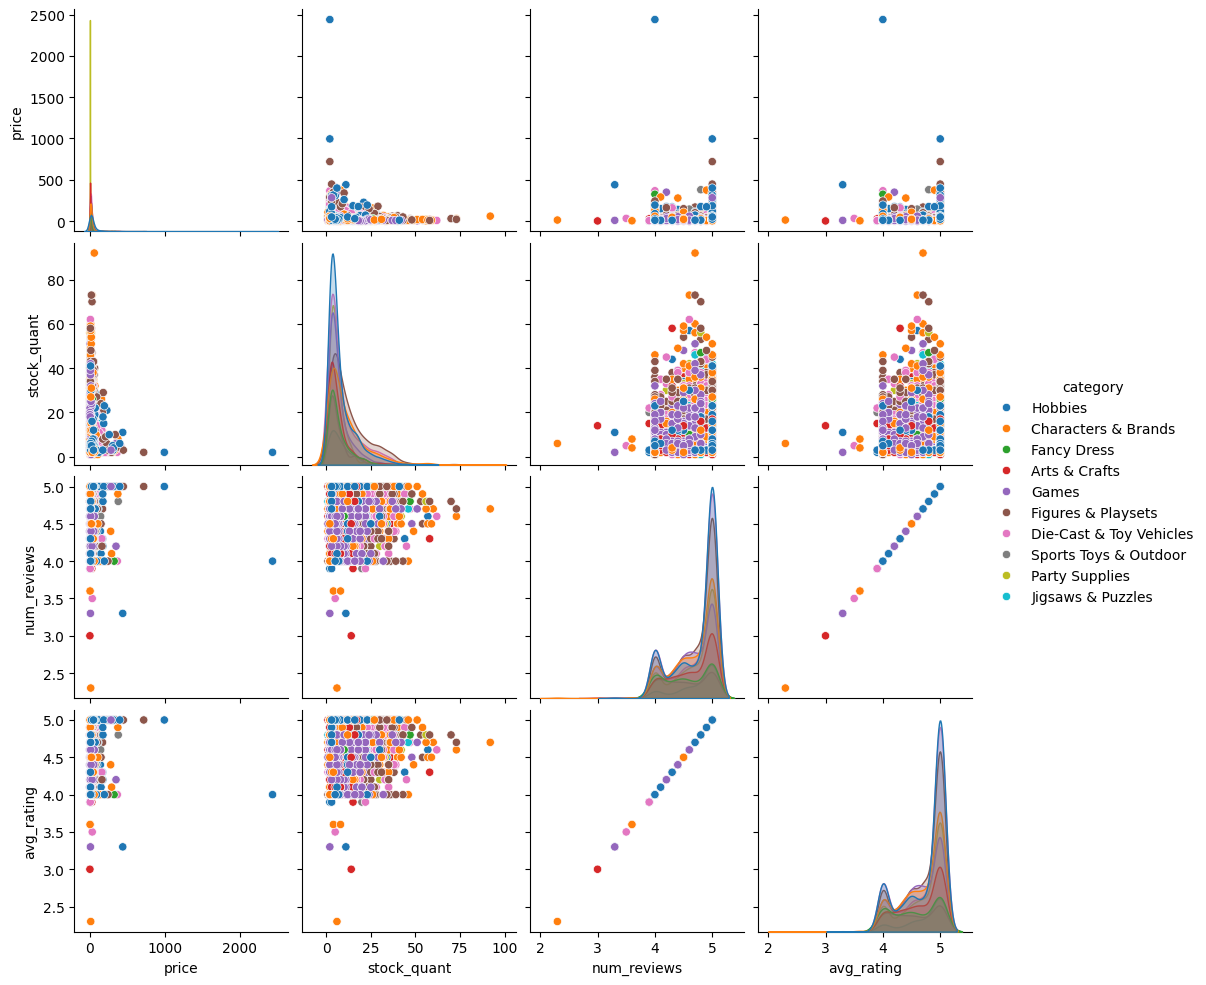

In [19]:
#pairwise plot to check correlation values pre normalisation encoding

#sns.pairplot(df, hue='category')
plt.show()

cateList=catedf['category'].to_list()
top10=cateList[:10]

sns.pairplot(df[df['category'].isin(top10)], hue='category')
plt.show()

## Data Preprocessing
Normalizing price, stock quant num reviews and avg rating using Z-score normalization.


In [20]:

cols=['price', 'stock_quant', 'num_reviews', 'avg_rating']

scaler = preprocessing.StandardScaler().fit_transform(df[cols])

#df[cols] = scaler.fit_transform(df[cols])

scaler = pd.DataFrame(scaler, columns = cols)

df=scaler.join(df.reset_index(), lsuffix='_scaled').drop(cols, axis=1)

df=df.reset_index().drop('level_0', axis=1)




# Data Analysis + Insights

Query selection process:
Now to identify targets for the cosine similarity 

Item 1: top rated item in top category (Hobbies) with low stock (==1)

#1078 low price
#3135
#4583 high price

Item 2: areas to avoid (high stock quant, high price) query 2?

#1188

Item 3: exploring bad product to offer better alt solutions to them??

#4075

In [21]:
df

,price_scaled,stock_quant_scaled,num_reviews_scaled,avg_rating_scaled,index,product_name,manufacturer,category,subcategory
0,-0.349297,-0.408358,0.557496,0.557496,0,Hornby 2014 Catalogue,Hornby,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
1,-0.210957,-0.763990,-2.152192,-2.152192,1,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
2,1.051158,-0.645446,-1.068317,-1.068317,2,Hornby Santa's Express Train Set,Hornby,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
3,4.539134,-0.526902,0.828465,0.828465,3,Hornby Gauge Western Express Digital Train Set...,Hornby,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
4,0.157528,-0.289814,0.828465,0.828465,4,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
...,...,...,...,...,...,...,...,...,...
5899,-0.210957,-0.408358,-1.881223,-1.881223,5899,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,Hobbies,Collectible Figures & Memorabilia > Collectibl...
5900,0.061932,-0.408358,0.828465,0.828465,5900,Batman 1966 TV Series Action Figures - The Rid...,Mattel,Hobbies,Collectible Figures & Memorabilia > Collectibl...
5901,0.504957,-0.645446,0.828465,0.828465,5901,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,Novelty & Special Use,Novelty > Accessories > Buttons & Pins
5902,0.627505,-0.645446,0.828465,0.828465,5902,Justice League of America Series 3 Green Lante...,DC Comics,Hobbies,Collectible Figures & Memorabilia > Collectibl...


For items most similar to 1078: 

In [22]:
#new df with plot y axis with item numbers 1078,1188,and 4075, and x axis with relative c score. label= manufacturer/ product name 
cols=['price_scaled', 'stock_quant_scaled', 'num_reviews_scaled', 'avg_rating_scaled']

target1=df[cols].loc[1078]

distances=scipy.spatial.distance.cdist(df[cols], [target1], metric='cosine').flatten()
query_distances=list(zip(df.index,distances))
x=[]
y=[]

for index, score in sorted(query_distances, key=lambda x:x[1], reverse= False)[1:11]:
    x.append(index)
    y.append(score)
    

target=df.loc[x]
target['cscore']=y
target['y']=1078
target['product_name_y']=df.loc[1078,'product_name']
sumdf=df.join(target[['cscore', 'y', 'index', 'product_name_y']].set_index('index'), how='left' ,on='index',lsuffix='_left', rsuffix='_right')
sumdf





,price_scaled,stock_quant_scaled,num_reviews_scaled,avg_rating_scaled,index,product_name,manufacturer,category,subcategory,cscore,y,product_name_y
0,-0.349297,-0.408358,0.557496,0.557496,0,Hornby 2014 Catalogue,Hornby,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...,NaN,NaN,NaN
1,-0.210957,-0.763990,-2.152192,-2.152192,1,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...,NaN,NaN,NaN
2,1.051158,-0.645446,-1.068317,-1.068317,2,Hornby Santa's Express Train Set,Hornby,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...,NaN,NaN,NaN
3,4.539134,-0.526902,0.828465,0.828465,3,Hornby Gauge Western Express Digital Train Set...,Hornby,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...,NaN,NaN,NaN
4,0.157528,-0.289814,0.828465,0.828465,4,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5899,-0.210957,-0.408358,-1.881223,-1.881223,5899,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,Hobbies,Collectible Figures & Memorabilia > Collectibl...,NaN,NaN,NaN
5900,0.061932,-0.408358,0.828465,0.828465,5900,Batman 1966 TV Series Action Figures - The Rid...,Mattel,Hobbies,Collectible Figures & Memorabilia > Collectibl...,NaN,NaN,NaN
5901,0.504957,-0.645446,0.828465,0.828465,5901,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,Novelty & Special Use,Novelty > Accessories > Buttons & Pins,NaN,NaN,NaN
5902,0.627505,-0.645446,0.828465,0.828465,5902,Justice League of America Series 3 Green Lante...,DC Comics,Hobbies,Collectible Figures & Memorabilia > Collectibl...,NaN,NaN,NaN


For items most similar to 1188: 

In [23]:
#Item 1: top rated item in top category (Hobbies) with low stock (==1)
target2=df[cols].loc[1188]

distances=scipy.spatial.distance.cdist(df[cols], [target2], metric='cosine').flatten()
query_distances=list(zip(df.index,distances))
x=[]
y=[]

for index, score in sorted(query_distances, key=lambda x:x[1], reverse= False)[1:11]:
    x.append(index)
    y.append(score)
    print 


target2=df.loc[x]
sumdf.loc[x]['cscore']=y
sumdf.loc[x,'y']=1188
sumdf.loc[x,'cscore']=y
sumdf.loc[x,'product_name_y']=df.loc[1188,'product_name']
sumdf.loc[x]




,price_scaled,stock_quant_scaled,num_reviews_scaled,avg_rating_scaled,index,product_name,manufacturer,category,subcategory,cscore,y,product_name_y
4007,0.209327,2.318152,0.015559,0.015559,4007,Star Wars Command Star Destroyer Set,Star Wars,Characters & Brands,Star Wars > Toys,0.000040,1188.0,LEGO Star Wars 75103: First Order Transporter
5303,0.167214,2.318152,0.015559,0.015559,5303,McFarlane Walking Dead 10-inch TV Daryl Dixon ...,McFarlane,Figures & Playsets,Science Fiction & Fantasy,0.000108,1188.0,LEGO Star Wars 75103: First Order Transporter
4897,0.104887,1.251257,0.015559,0.015559,4897,Ben and Holly Thistle Castle Playset,Ben & Holly,Figures & Playsets,Accessories,0.000118,1188.0,LEGO Star Wars 75103: First Order Transporter
5194,0.062775,0.895625,0.015559,0.015559,5194,Jake and The Never Land Pirates Deluxe Adventu...,Disney Junior,Characters & Brands,Disney > Toys,0.000358,1188.0,LEGO Star Wars 75103: First Order Transporter
3297,0.055616,0.658537,0.015559,0.015559,3297,The Fast and the Furious Diecast Modell 1/43 D...,Greenlight,Die-Cast & Toy Vehicles,Toy Vehicles & Accessories > Scaled Models > V...,0.000483,1188.0,LEGO Star Wars 75103: First Order Transporter
1890,0.102361,2.081064,0.015559,0.015559,1890,German Panzerkampfwagen VI Tiger I Ausfuhrung ...,Tamiya,Hobbies,Model Building Kits > Tanks,0.000670,1188.0,LEGO Star Wars 75103: First Order Transporter
3975,0.258388,2.081064,0.015559,0.015559,3975,MAN TGA Construction Truck and Liebherr Excava...,Bruder,Die-Cast & Toy Vehicles,Toy Vehicles & Accessories > Toy Cars & Trucks,0.000785,1188.0,LEGO Star Wars 75103: First Order Transporter
3439,0.043613,0.895625,0.015559,0.015559,3439,Playmobil 5233 Dinos Deinonychus and Velocirap...,Playmobil,Figures & Playsets,Dinosaurs,0.000902,1188.0,LEGO Star Wars 75103: First Order Transporter
2177,0.187007,4.570486,0.015559,0.015559,2177,Playmobil 5481 Dragons Dragon Battle Ship,Playmobil,Figures & Playsets,Knights & Castles,0.000967,1188.0,LEGO Star Wars 75103: First Order Transporter
2244,0.060037,1.606888,0.015559,0.015559,2244,Lions Den Knight Castle - Fisher Price - Imagi...,Imaginext,Figures & Playsets,Knights & Castles,0.001191,1188.0,LEGO Star Wars 75103: First Order Transporter


For items most similar to 4075: 

In [24]:
target3=df[cols].loc[4075]

distances=scipy.spatial.distance.cdist(df[cols], [target3], metric='cosine').flatten()
query_distances=list(zip(df.index,distances))
x=[]
y=[]

for index, score in sorted(query_distances, key=lambda x:x[1], reverse= False)[1:11]:
    x.append(index)
    y.append(score)

target3=df.loc[x]

sumdf.loc[x]['cscore']=y
sumdf.loc[x,'y']=4075
sumdf.loc[x,'cscore']=y
sumdf.loc[x,'product_name_y']=df.loc[4075,'product_name']
sumdf=sumdf.dropna()
sumdf

#to fix graphing




,price_scaled,stock_quant_scaled,num_reviews_scaled,avg_rating_scaled,index,product_name,manufacturer,category,subcategory,cscore,y,product_name_y
804,0.020662,-0.052726,-1.068317,-1.068317,804,Intex Swim Centre Family Lounge Pool,Toy Brokers,Sports Toys & Outdoor,Beach Toys > Paddling Pools,0.000473,4075.0,Transformers - One Step Magic - Bumblebee
853,-0.089673,-0.289814,0.286528,0.286528,853,Nerf Vortex Diatron A1173E310 Disc Blaster,Nerf,Sports Toys & Outdoor,Beach Toys > Water Pistols,0.000522,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
1176,-0.134944,-0.645446,0.557496,0.557496,1176,Character Options Bob The Builder Power Drill ...,Character Options,Characters & Brands,Bob the Builder > Toys,0.001118,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
1711,-0.053035,-0.052726,-1.881223,-1.881223,1711,Sexy Bandit Ladies Fancy Dress Costume M,Wicked,Fancy Dress,Costumes > Adults,0.000074,4075.0,Transformers - One Step Magic - Bumblebee
1890,0.102361,2.081064,0.015559,0.015559,1890,German Panzerkampfwagen VI Tiger I Ausfuhrung ...,Tamiya,Hobbies,Model Building Kits > Tanks,0.000670,1188.0,LEGO Star Wars 75103: First Order Transporter
1992,-0.126732,-0.052726,-1.881223,-1.881223,1992,"Miniart 1:35 Scale ""Street with Park Wall Dior...",Miniart,Hobbies,Model Trains & Railway Sets > Accessories > Fi...,0.000540,4075.0,Transformers - One Step Magic - Bumblebee
2008,-0.274126,-0.882534,0.828465,0.828465,2008,Black Embellished Masquerade Mask - Classic Ve...,Samantha Peach,Fancy Dress,Accessories > Masks,0.000389,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
2177,0.187007,4.570486,0.015559,0.015559,2177,Playmobil 5481 Dragons Dragon Battle Ship,Playmobil,Figures & Playsets,Knights & Castles,0.000967,1188.0,LEGO Star Wars 75103: First Order Transporter
2236,-0.051982,-0.052726,-1.881223,-1.881223,2236,Princess Stencils,Djeco,Figures & Playsets,Knights & Castles,0.000073,4075.0,Transformers - One Step Magic - Bumblebee
2244,0.060037,1.606888,0.015559,0.015559,2244,Lions Den Knight Castle - Fisher Price - Imagi...,Imaginext,Figures & Playsets,Knights & Castles,0.001191,1188.0,LEGO Star Wars 75103: First Order Transporter


### Data Visualisation

In [25]:
import textwrap
#plt.scatter(y=sumdf['product_name_y'], x=sumdf['cscore'] )

plt.figure(figsize=(170, 55))  # Set figure size

    # Create dot plot
ax=sns.scatterplot(
    data=sumdf,
    x="cscore",        # X-axis: Cosine score
    y="product_name_y",  # Y-axis: Product names
    hue="category",  # Color by manufacturer
    palette=sns.color_palette("Set2"),   # Distinct colors
    s=35000,            # Size of dots
    edgecolor="none",  # Add border to dots
    alpha=0.3
    
)
sns.set_theme(style="whitegrid")
legend=plt.legend(
    title="Category", 
    title_fontsize=70, 
    fontsize=50, 
    loc="upper right", 
    frameon=True,
    ncol=1,  # Splits legend into two columns (affects width)
    bbox_to_anchor=(1.2, 1.2),  # Moves legend outside the plot
    borderaxespad=10,  # Adds padding inside the legend, 
    borderpad=3,
    labelspacing=7,  # Reduced to avoid excessive space
    columnspacing=1.5,  
    handlelength=6,  # Adjusted marker size
    handletextpad=1.5,


    facecolor='#f0fcfb'
)

wrapped_labels =[]
for label in sumdf["product_name_y"].unique():
    wrapped_labels.append(textwrap.fill(label, width=20))  # Wrap text at 20 characters
ax.set_yticklabels(wrapped_labels)


# Add labels to points

# Labels and title
ax.set(xlabel="Cosine Score", ylabel="Target Products")
ax.set_facecolor('whitesmoke')
plt.xlabel("Cosine Score", fontsize=70, labelpad=10)
plt.ylabel("Target Products", fontsize=80, labelpad=20)
plt.yticks(fontsize=80 )  # Adjust font size for readability
plt.xticks(fontsize=50, rotation=45)
plt.xticks(np.arange(0, 0.0017, step=0.0005))

sns.despine(left=True, bottom=True)
#ax.xaxis.set_major_locator(MultipleLocator(5))
# Show plot

plt.show()

/var/folders/8_/1nr27d3d3b542g2jsfx6yp6c0000gn/T/ipykernel_1962/936981563.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(wrapped_labels)


## Alt

In [26]:
import textwrap
#plt.scatter(y=sumdf['product_name_y'], x=sumdf['cscore'] )

plt.figure(figsize=(55, 170))  # Set figure size

    # Create dot plot
ax=sns.scatterplot(
    data=sumdf,
    y="cscore",        # X-axis: Cosine score
    x="product_name_y",  # Y-axis: Product names
    hue="category",  # Color by manufacturer
    palette=sns.color_palette("Set2"),   # Distinct colors
    s=35000,            # Size of dots
    edgecolor="none",  # Add border to dots
    alpha=0.3
    
)
#ax.set_title("Querying Product Cosine Similarity", fontsize=100)
sns.set_theme(style="whitegrid")

legend=plt.legend(
    title="Category", 
    title_fontsize=70, 
    fontsize=50, 
    loc="upper center", 
    frameon=True,
    ncol=3,  # Splits legend into two columns (affects width)
    bbox_to_anchor=(1, 1.2),  # Moves legend outside the plot
    borderaxespad=7,  # Adds padding inside the legend, 
    borderpad=3,
    labelspacing=4,  # Reduced to avoid excessive space
    columnspacing=1,  
    handlelength=4,  # Adjusted marker size
    handletextpad=1.5,



    facecolor='#f0fcfb'
)

wrapped_labels =[]
for label in sumdf["product_name_y"].unique():
    wrapped_labels.append(textwrap.fill(label, width=20))  # Wrap text at 20 characters
ax.set_xticklabels(wrapped_labels)


# Add labels to points
for i, (y, label, x) in enumerate(zip(sumdf["cscore"], sumdf["manufacturer"], sumdf["product_name_y"])):
    ax.text(x,y , textwrap.fill(textwrap.shorten(label,width=17), width=20), fontsize=35, verticalalignment='center', horizontalalignment='center')

# Labels and title
ax.set(ylabel="Cosine Score", xlabel="Target Products")
ax.set_facecolor('whitesmoke')
plt.ylabel("Cosine Score", fontsize=70, labelpad=10)
plt.xlabel("Target Products", fontsize=80, labelpad=20)
plt.xticks(fontsize=80 )  # Adjust font size for readability
plt.yticks(fontsize=50, rotation=45)
plt.yticks(np.arange(0, 0.0017, step=0.0005))

sns.despine(left=True, bottom=True)

plt.show()

/var/folders/8_/1nr27d3d3b542g2jsfx6yp6c0000gn/T/ipykernel_1962/769771713.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels)


In [27]:
sumdf

,price_scaled,stock_quant_scaled,num_reviews_scaled,avg_rating_scaled,index,product_name,manufacturer,category,subcategory,cscore,y,product_name_y
804,0.020662,-0.052726,-1.068317,-1.068317,804,Intex Swim Centre Family Lounge Pool,Toy Brokers,Sports Toys & Outdoor,Beach Toys > Paddling Pools,0.000473,4075.0,Transformers - One Step Magic - Bumblebee
853,-0.089673,-0.289814,0.286528,0.286528,853,Nerf Vortex Diatron A1173E310 Disc Blaster,Nerf,Sports Toys & Outdoor,Beach Toys > Water Pistols,0.000522,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
1176,-0.134944,-0.645446,0.557496,0.557496,1176,Character Options Bob The Builder Power Drill ...,Character Options,Characters & Brands,Bob the Builder > Toys,0.001118,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
1711,-0.053035,-0.052726,-1.881223,-1.881223,1711,Sexy Bandit Ladies Fancy Dress Costume M,Wicked,Fancy Dress,Costumes > Adults,0.000074,4075.0,Transformers - One Step Magic - Bumblebee
1890,0.102361,2.081064,0.015559,0.015559,1890,German Panzerkampfwagen VI Tiger I Ausfuhrung ...,Tamiya,Hobbies,Model Building Kits > Tanks,0.000670,1188.0,LEGO Star Wars 75103: First Order Transporter
1992,-0.126732,-0.052726,-1.881223,-1.881223,1992,"Miniart 1:35 Scale ""Street with Park Wall Dior...",Miniart,Hobbies,Model Trains & Railway Sets > Accessories > Fi...,0.000540,4075.0,Transformers - One Step Magic - Bumblebee
2008,-0.274126,-0.882534,0.828465,0.828465,2008,Black Embellished Masquerade Mask - Classic Ve...,Samantha Peach,Fancy Dress,Accessories > Masks,0.000389,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
2177,0.187007,4.570486,0.015559,0.015559,2177,Playmobil 5481 Dragons Dragon Battle Ship,Playmobil,Figures & Playsets,Knights & Castles,0.000967,1188.0,LEGO Star Wars 75103: First Order Transporter
2236,-0.051982,-0.052726,-1.881223,-1.881223,2236,Princess Stencils,Djeco,Figures & Playsets,Knights & Castles,0.000073,4075.0,Transformers - One Step Magic - Bumblebee
2244,0.060037,1.606888,0.015559,0.015559,2244,Lions Den Knight Castle - Fisher Price - Imagi...,Imaginext,Figures & Playsets,Knights & Castles,0.001191,1188.0,LEGO Star Wars 75103: First Order Transporter


### Exporting for Tableau
Adjusting for overlapping x,y coordinates. Issues with labeling.

In [31]:

scores=sumdf.drop(columns=['price_scaled', 'stock_quant_scaled',	'num_reviews_scaled', 'avg_rating_scaled'], axis=1)
scores=scores.sort_values(by=['y','cscore'])
scores=scores.rename(columns={"y":"target_index", "product_name_y":"target_product_name"})
scores.to_csv('cleaned_ecommerce.csv', index=True)
scores

,index,product_name,manufacturer,category,subcategory,cscore,target_index,target_product_name
2937,2937,Star Wars Clone Wars Card Game,Ravensburger,Characters & Brands,Ravensburger > Games,0.000000,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
2008,2008,Black Embellished Masquerade Mask - Classic Ve...,Samantha Peach,Fancy Dress,Accessories > Masks,0.000389,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
853,853,Nerf Vortex Diatron A1173E310 Disc Blaster,Nerf,Sports Toys & Outdoor,Beach Toys > Water Pistols,0.000522,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
4977,4977,The Puppet Company - Long Sleeves - Fox Hand P...,The Puppet Company,Puppets & Puppet Theatres,Hand Puppets,0.000881,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
1176,1176,Character Options Bob The Builder Power Drill ...,Character Options,Characters & Brands,Bob the Builder > Toys,0.001118,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
4595,4595,Bigjigs Rail Fruit and Veg Train,Bigjigs Rail,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...,0.001169,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
5191,5191,Bigjigs Toys Heritage Playset Pirates Set,Bigjigs Toys,Figures & Playsets,Pirates,0.001169,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
4984,4984,Fiesta Crafts Prince Hand Puppet,Fiesta,Puppets & Puppet Theatres,Hand Puppets,0.001433,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
2494,2494,The Puppet Company - Long Sleeves - Horse Hand...,The Puppet Company,Puppets & Puppet Theatres,Hand Puppets,0.001557,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
4987,4987,The Puppet Company - Long Sleeves - Wild Rabbi...,The Puppet Company,Puppets & Puppet Theatres,Hand Puppets,0.001557,1078.0,Micro Scalextric G2043W Peugeot 206 WRC 1:64 S...
